In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import plotly.express as px
import matplotlib.pyplot as plt
import Library
import itertools

from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from pyclustering.cluster import cluster_visualizer
from pyclustering.utils import read_sample
from pyclustering.cluster.silhouette import silhouette

## <hr><center>Load the datasets cleaned by the Task 1 Notebook</center><hr>

In [ ]:
players_df = pd.read_csv('../data_cleaned/players.csv')
print(f'(players_df) Loading {players_df.shape[0]} rows from "../data_cleaned/players_df.csv"')

matches_df = pd.read_csv('../data_cleaned/matches_side.csv')
print(f'(matches_side_df) Loading {matches_df.shape[0]} rows from "../data_cleaned/matches_side_df.csv"')

players_statistics    = Library.deserialize_statistics('data/players_df.stat')
match_side_statistics = Library.deserialize_statistics('data/match_side_df.stat')


(players_df) Loading 1918 rows from "../data_cleaned/players_df.csv"
(matches_side_df) Loading 370946 rows from "../data_cleaned/matches_side_df.csv"


## <hr><center>BSAS</center><hr>

In [ ]:
# Consider the clustering attributes we searched and selected for the task.
clustering_attributes = ['avg_ace%', 'avg_df%', 'avg_1st%', 'avg_bpSaved%', 'win_rate', 'rank_points']

# Normalize the resulting data using StandardScaler.
scaler = StandardScaler()
numerical_attributes = Library.numerical_attributes(players_statistics)
norm_players_df = pd.DataFrame(scaler.fit_transform(players_df[numerical_attributes]), columns=numerical_attributes)
clustering_players_df = norm_players_df[clustering_attributes]


In [ ]:
from pyclustering.cluster.bsas import bsas, bsas_visualizer
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import SIMPLE_SAMPLES

sample = clustering_players_df.to_numpy()

# The threshold is the max allowed distance between points in a cluster, from the distributions above
# We chose to search linearly in the range and compare the results by looking at the sizes
# of the clusters combined with the silhouette score.

threshold = np.linspace(0.01, 5, 30)

# Selected number of clusters.
max_clusters = 5

for t in threshold:
    
    # Create instance of BSAS algorithm.
    bsas_instance = bsas(sample, max_clusters, t)
    bsas_instance.process()
    
    # Get clustering results.
    clusters = bsas_instance.get_clusters()
    representatives = bsas_instance.get_representatives()
    print('threshold =', t)
    print(sorted([len(c) for c in clusters]))
    score = silhouette(clustering_players_df.to_numpy(), clusters).process().get_score()
    print('sil =', sum(score)/len(score))
    print('---')

threshold = 0.01
[8, 52, 181, 799, 878]
sil = 0.06325307364556282
---
threshold = 0.1820689655172414
[8, 52, 181, 799, 878]
sil = 0.06325307364556282
---
threshold = 0.35413793103448277
[8, 52, 181, 799, 878]
sil = 0.06325307364556282
---
threshold = 0.5262068965517241
[8, 52, 181, 799, 878]
sil = 0.06325307364556282
---
threshold = 0.6982758620689655
[8, 52, 181, 799, 878]
sil = 0.06325307364556282
---
threshold = 0.8703448275862069
[8, 52, 181, 799, 878]
sil = 0.06325307364556282
---
threshold = 1.0424137931034483
[8, 52, 181, 799, 878]
sil = 0.06325307364556282
---
threshold = 1.2144827586206897
[8, 52, 181, 799, 878]
sil = 0.06325307364556282
---
threshold = 1.386551724137931
[8, 52, 181, 799, 878]
sil = 0.06325307364556282
---
threshold = 1.5586206896551724
[8, 52, 181, 799, 878]
sil = 0.06325307364556282
---
threshold = 1.7306896551724138
[8, 52, 181, 799, 878]
sil = 0.06325307364556282
---
threshold = 1.9027586206896552
[8, 52, 181, 799, 878]
sil = 0.06325307364556282
---
thresh

In [ ]:
# We can see that the cluster size distribution is identical until threshold is larger than 2
# The silhouette already estimates the clustering reesults to not be good.

bsas_instance = bsas(sample, 5, 1.5)
bsas_instance.process()

# Get clustering results.

clusters = bsas_instance.get_clusters()
representatives = bsas_instance.get_representatives()

# BSAS uses a different method to represent the cluster results.
# We use this function to convert them back to the original format used throughout the project. 
def get_players_label(df, clusters):
    em_labels = np.zeros(df.shape[0])
    for cluster_label, rows in enumerate(clusters):
        for row in rows:
            em_labels[row] = cluster_label
    return em_labels

# Assign the label to each player.

players_df['bsasLabel'] = get_players_label(players_df, clusters)

0.0    878
1.0    799
2.0    181
3.0     52
4.0      8
Name: bsasLabel, dtype: int64


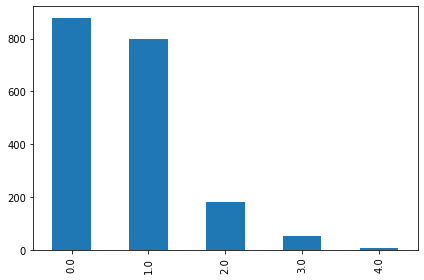

In [ ]:
# Consider the clustering sizes and reorder them by size.

Library.reorder_clusters(players_df, 'bsasLabel')
plt.gcf().set_size_inches(6, 4)
players_df['bsasLabel'].value_counts().sort_index().plot(kind='bar')
Library.save('bsas_cluster_sizes.svg')
print(players_df['bsasLabel'].value_counts())

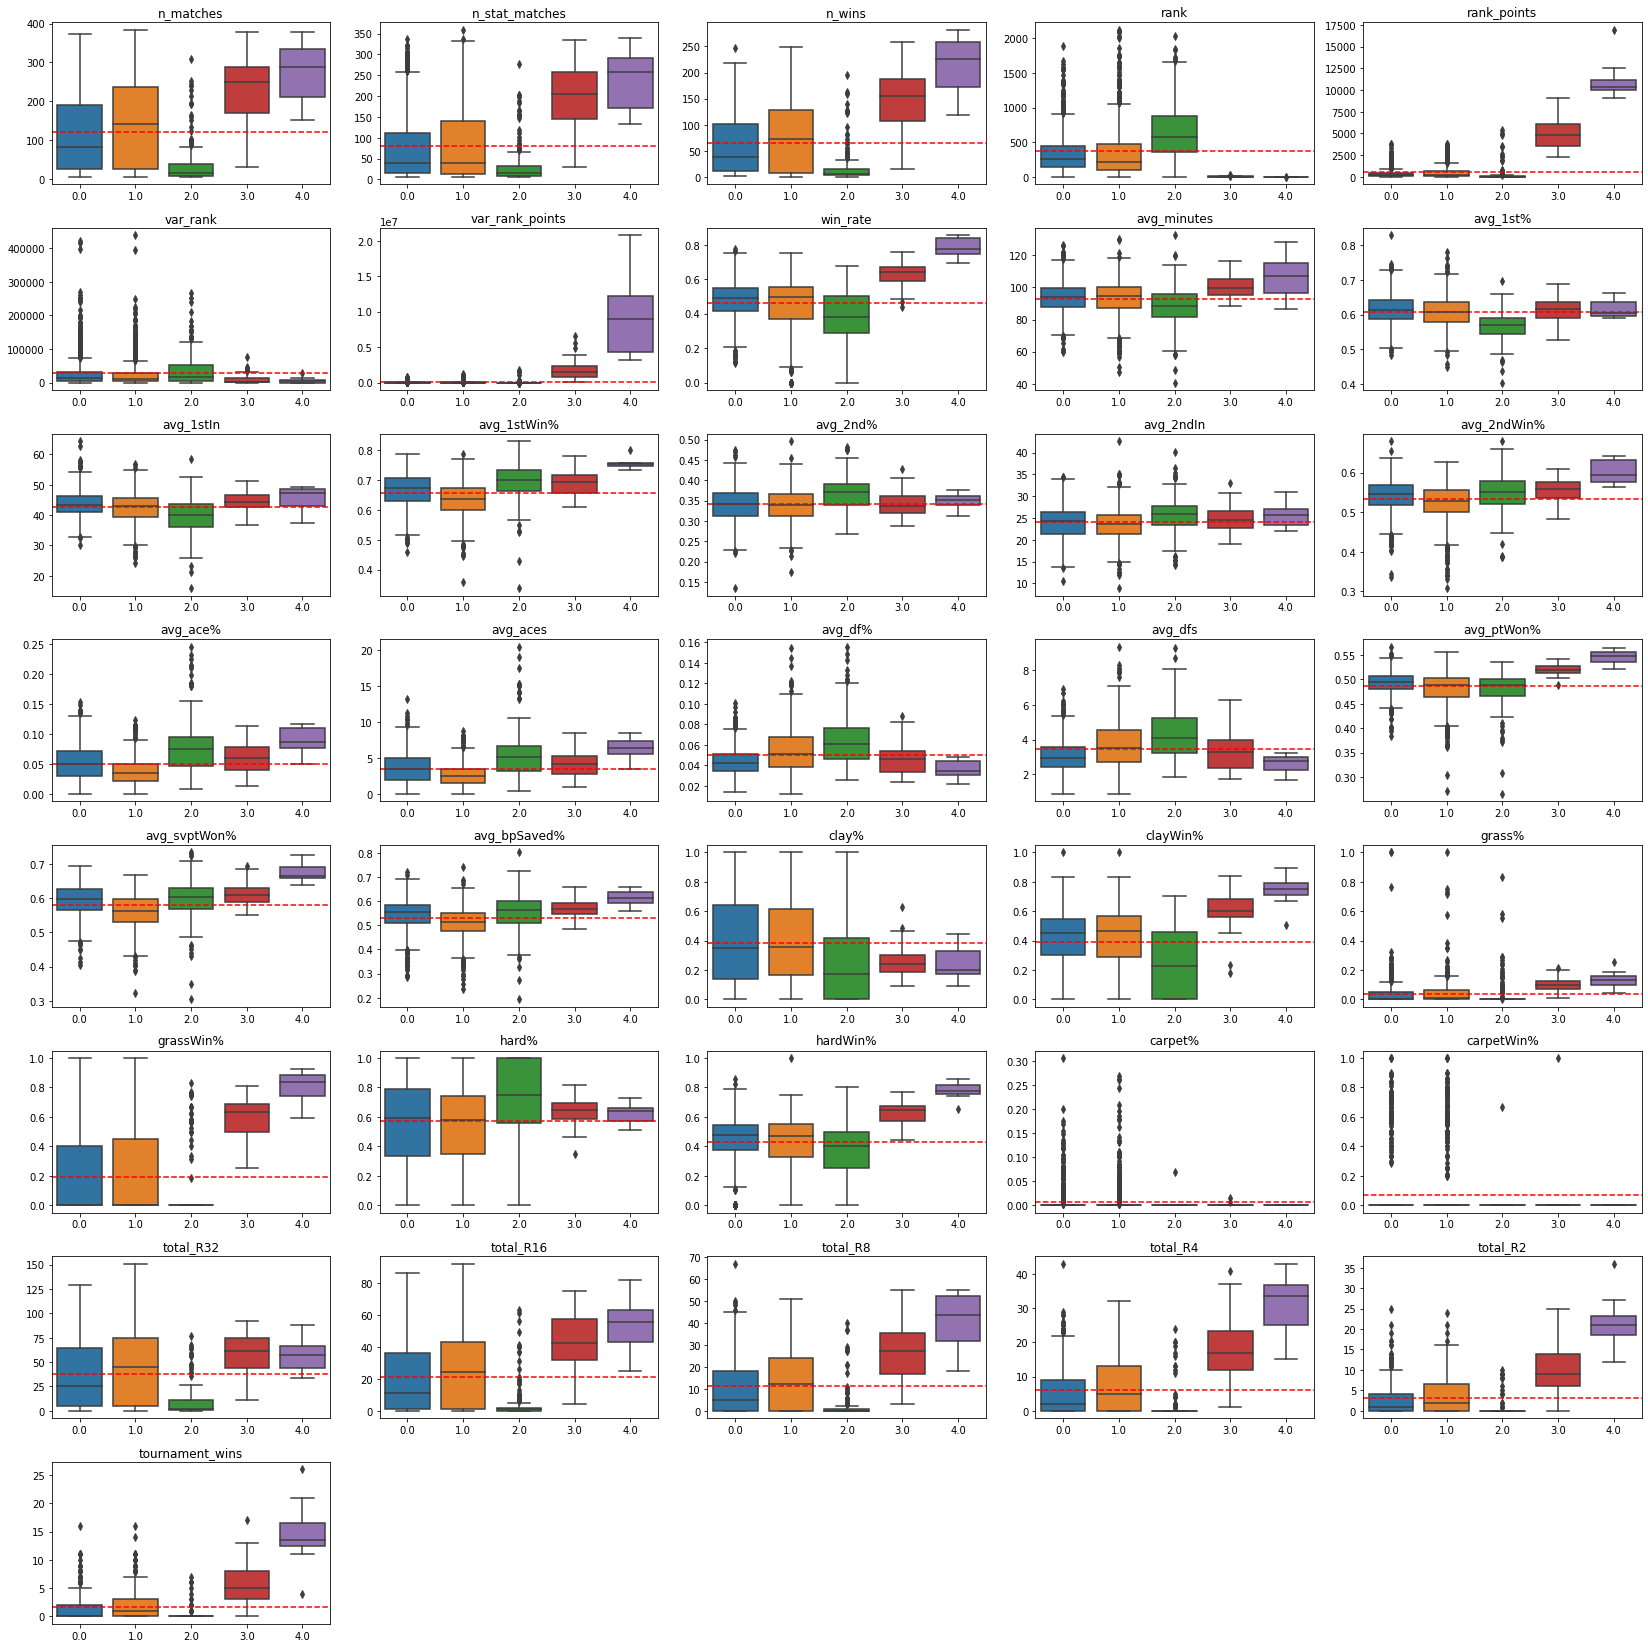

In [ ]:
# Plot the cluster statistics with the custom Library function.

plt.gcf().set_size_inches(23, 23)
plt.gcf().tight_layout()

plt.subplots_adjust(hspace=0.35)
Library.plot_clusters(players_statistics, players_df, 'bsasLabel')
Library.save('bsas_boxplots.svg')